# EL grid example

In [1]:
import evdm
import numpy as np
import matplotlib.pyplot as plt

We can create grid, using previously created body model

In [2]:
B = evdm.Body(lambda x: 1-x,101,velocity = 1e-3,dtype = 'float')
grid = evdm.GridEL(
    body = B,
    ptypes = 1,
    Ne = 20,
    Nl_func = lambda t_e: 20*t_e,
    RhoE = lambda te: 1-0.5*te, #optional
    RhoL = lambda te,tl: 1, #optional
    dtype = 'float')

Plotting a function $L_{max}(E)$ is the maximum allowd (by kinematic constraints) momentum

$Nlfunc = te \mapsto 20*te$, means, that the number of $L$ bins increases, when $E$ increase

$RhoE = te \mapsto 1-0.5 \cdot te$; is means, that the density of E bins decrease

from $1$ (when $E = E_{min}$, which corresponds $te = 0$) to $0.5$ (when $E = E_{max} = 0$, which corresponds $te = 1$)


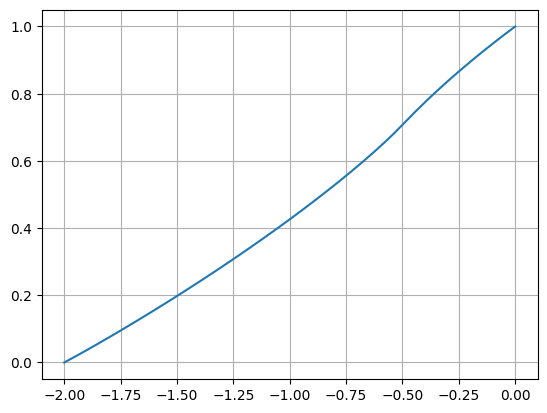

In [3]:
plt.plot(*grid.LE())
plt.grid(True)

Plotting a grid full

In [5]:
from matplotlib.collections import LineCollection

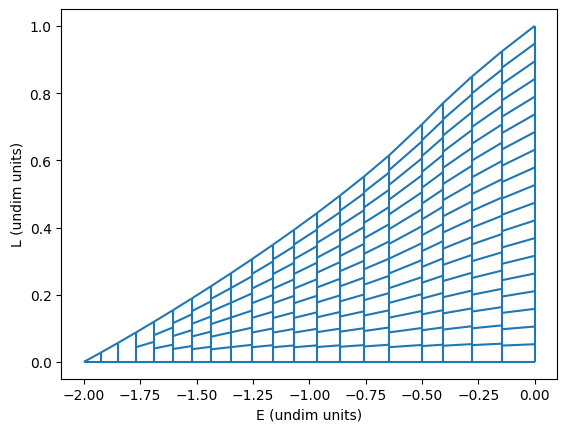

In [10]:
mlc = LineCollection(grid.plot())
fig, ax = plt.subplots()
ax.add_collection(mlc)
ax.autoscale()
plt.xlabel("E (undim units)")
plt.ylabel("L (undim units)")
plt.show()

To plot grid in internal representation use parametr "is_internal = True"

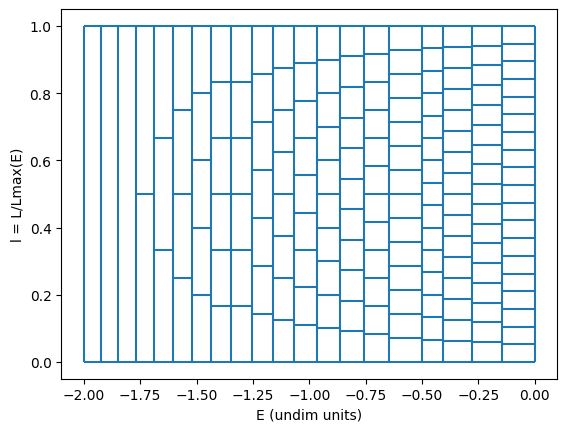

In [12]:
mlc = LineCollection(grid.plot(True))
fig, ax = plt.subplots()
ax.add_collection(mlc)
ax.autoscale()
plt.xlabel("E (undim units)")
plt.ylabel("l = L/Lmax(E)")
plt.show()